In [2]:
#A group project on pair trading done by Shamith Kandregula,Divyanshu Tiwari, Shreyansh Srivastav, Rishab pandey

## **PAIRS TRADING**

When it comes to pairs trading methods, a pair of equities usually takes a **market-neutral stance**. This indicates that the approach is unaffected by the direction of the larger market, whether it is rising or falling. Instead, the idea of **mean reversion** is the foundation of pairs trading. It becomes relevant when two securities with a strong positive correlation veer off the beaten track. The fundamental premise is that they'll eventually return to their previous pattern.It is a form of **statistical arbitrage**.

A price spread between the two equities is created during this deviation, providing a chance for profit. A trader can open a long position on a stock that is predicted to rise and a short position on one that is expected to fall. Profitable trades are produced when the pair behaves as predicted.

The trader can limit their losses even in situations where the pair deviates from expectations. This occurs as a result of gains on one security more than offsetting losses on another. Thus, pairs trading offers a way to reduce prospective losses and is used as a type of hedging.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import yfinance as yf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from datetime import datetime

## **Importing Stock Price dataset**

A three-year retrospective analysis, starting in July 2017 and ending in July 2020, is conducted in the context of putting this approach into action. Finding stock pairs with a high positive correlation is the main goal. We have chosen to concentrate on the individual stocks that make up the Pharma index since we will be paying closer attention to stocks that are part of the pharmaceutical industry.

In [4]:
NUM_TRADING_DAYS = 252


stocks = ["SUNPHARMA.NS", "DIVISLAB.NS", "CIPLA.NS", "BIOCON.NS", "TORNTPHARM.NS", "LUPIN.NS", "ZYDUSLIFE.NS","AUROPHARMA.NS","PEL.NS","ABBOTINDIA.NS"]

start_date = "2017-06-01"
end_date = "2020-06-01"

In [5]:
stock_data = {}

for stock in stocks:
  ticker = yf.Ticker(stock)
  stock_data[stock] = ticker.history(start = start_date, end = end_date)['Close']

stock_prices = pd.DataFrame(stock_data)
stock_prices.dropna()

,SUNPHARMA.NS,DIVISLAB.NS,CIPLA.NS,BIOCON.NS,TORNTPHARM.NS,LUPIN.NS,ZYDUSLIFE.NS,AUROPHARMA.NS,PEL.NS,ABBOTINDIA.NS
Date,,,,,,,,,,
2017-06-01 00:00:00+05:30,475.776733,568.633789,497.719330,157.348099,557.721680,1099.419678,443.897186,553.666748,1342.601562,4022.916504
2017-06-02 00:00:00+05:30,482.714874,584.171997,511.717926,159.716080,559.452942,1119.368774,465.811676,566.800476,1342.768188,4003.490234
2017-06-05 00:00:00+05:30,480.792786,595.884583,516.303589,161.804520,560.514771,1108.914795,462.418427,566.370605,1337.834351,4010.493408
2017-06-06 00:00:00+05:30,472.823425,595.317932,516.158752,163.054306,560.353149,1103.927246,461.381653,558.920227,1334.116211,4033.180908
2017-06-07 00:00:00+05:30,479.620819,610.006104,521.516907,164.073837,557.606201,1107.236206,506.058960,571.194336,1335.784546,4031.358887
...,...,...,...,...,...,...,...,...,...,...
2020-05-22 00:00:00+05:30,450.511871,2274.609131,627.677368,347.713776,1237.837402,872.828186,339.060181,708.973999,493.756042,15941.469727
2020-05-26 00:00:00+05:30,440.674316,2250.784180,616.240051,355.654694,1228.581055,885.733704,330.845245,693.502441,469.386780,16308.464844
2020-05-27 00:00:00+05:30,432.756287,2245.587891,621.492371,348.259735,1143.393433,874.587952,330.160675,691.998962,495.931427,16142.677734


## **Identifying stock pairs**

**Cointegration**

The most common test for Pairs Trading is the cointegration test. Cointegration is a statistical property of two or more time-series variables which indicates if a linear combination of the variables is stationary.

Let us understand the statement above. In this case, The two-time series variables are the log of stocks A and B prices. A Linear combination of these variables can be a linear equation defining the spread.

The spread can be computed using the formula:

**Spread = log(a) – n * log(b)**

Here, 'a' and 'b' represent the prices of stocks A and B, respectively. For each purchase of stock A, you've simultaneously sold 'n' shares of stock B. If both 'a' and 'b' increase in such a way that the spread value diminishes, it can lead to a financial loss. This occurs because stock A is experiencing slower growth compared to stock B, and you have a short position on stock B.

So if we start with ‘n’, which is called the **hedge ratio**, so that spread = 0, the property of stationary implies that the expected value of spread will remain as 0. Any deviation from this expected value is a case for statistical abnormality, hence a case for pairs trading!

In [6]:

hedge_ratios = {}


stock_symbols = stock_prices.columns


for i in range(len(stock_symbols) - 1):
    for j in range(i + 1, len(stock_symbols)):
        stock_1 = stock_prices[stock_symbols[i]]
        stock_2 = stock_prices[stock_symbols[j]]


        X = sm.add_constant(stock_1)
        model = sm.OLS(stock_2, X).fit()
        hedge_ratio = model.params[stock_symbols[i]]


        pair = (stock_symbols[i], stock_symbols[j])
        hedge_ratios[pair] = hedge_ratio


hedge_ratios

{('SUNPHARMA.NS', 'DIVISLAB.NS'): -3.8926704303820996,
 ('SUNPHARMA.NS', 'CIPLA.NS'): 0.7342274790826108,
 ('SUNPHARMA.NS', 'BIOCON.NS'): 0.025536535113210537,
 ('SUNPHARMA.NS', 'TORNTPHARM.NS'): -0.954850826468735,
 ('SUNPHARMA.NS', 'LUPIN.NS'): 0.9949662493349708,
 ('SUNPHARMA.NS', 'ZYDUSLIFE.NS'): 0.8764789487601126,
 ('SUNPHARMA.NS', 'AUROPHARMA.NS'): 0.6467204488111328,
 ('SUNPHARMA.NS', 'PEL.NS'): 2.668530434708796,
 ('SUNPHARMA.NS', 'ABBOTINDIA.NS'): -26.146279268956313,
 ('DIVISLAB.NS', 'CIPLA.NS'): -0.06438359835732695,
 ('DIVISLAB.NS', 'BIOCON.NS'): 0.0655913146036648,
 ('DIVISLAB.NS', 'TORNTPHARM.NS'): 0.3199528445040197,
 ('DIVISLAB.NS', 'LUPIN.NS'): -0.16277887583307524,
 ('DIVISLAB.NS', 'ZYDUSLIFE.NS'): -0.1500063711594348,
 ('DIVISLAB.NS', 'AUROPHARMA.NS'): -0.08216499619298943,
 ('DIVISLAB.NS', 'PEL.NS'): -0.5110281954802603,
 ('DIVISLAB.NS', 'ABBOTINDIA.NS'): 7.1963870993679535,
 ('CIPLA.NS', 'BIOCON.NS'): 0.09241540265218294,
 ('CIPLA.NS', 'TORNTPHARM.NS'): -0.8156176

In [7]:
#finding the pair using spread
spread_df = pd.DataFrame(index=stock_prices.index)
smallest_magnitude = float('inf')
selected_pair = None

for pair, hedge_ratio in hedge_ratios.items():
    stock1, stock2 = pair
    spread = np.log(stock_prices[stock1]) - hedge_ratio * np.log(stock_prices[stock2])
    spread_df[pair] = spread
    magnitude = np.abs(spread).mean()
    if magnitude < smallest_magnitude:
        smallest_magnitude = magnitude
        selected_pair = pair


selected_pair

('CIPLA.NS', 'AUROPHARMA.NS')

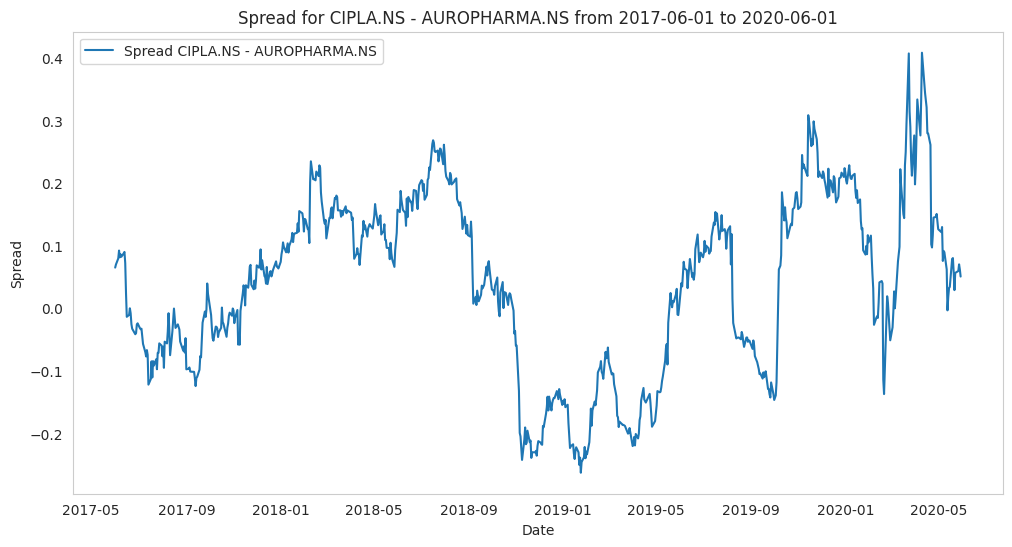

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(spread_df.index, spread_df[selected_pair], label=f"Spread {selected_pair[0]} - {selected_pair[1]}")
plt.title(f"Spread for {selected_pair[0]} - {selected_pair[1]} from {start_date} to {end_date}")
plt.xlabel("Date")
plt.ylabel("Spread")
plt.legend()
plt.grid()
plt.show()

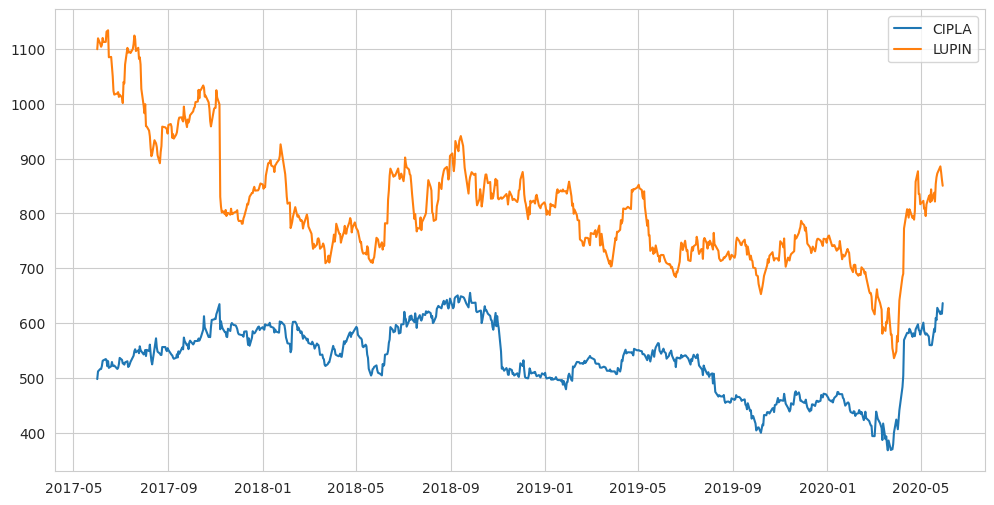

In [9]:
plt.figure(figsize = (12, 6))
plt.plot(stock_prices['CIPLA.NS'], label = 'CIPLA')
plt.plot(stock_prices['LUPIN.NS'], label = 'LUPIN')
plt.legend()
plt.show()

## **Verifying stock pairs with cointegrated time series**

The pairs of stocks having a cointegration are those with a **p-value** less than the threshold of **0.05**. P-value can be considered as a measure of the strength of cointegration between the two series. A lower p-value indicates a stronger cointegration.

In [10]:
#cointegration test/analysis
spread_df = spread_df[start_date:end_date]
spread_values = spread_df[selected_pair].dropna()
result = adfuller(spread_values)
p_value = result[1]


if p_value < 0.05:
    print(f"The p-value is {p_value}. The signal is stationary with 95% confidence.")
else:
    print(f"The p-value is {p_value}. The signal is not stationary with 95% confidence.")

The p-value is 0.11743478370824234. The signal is not stationary with 95% confidence.


## **Testing Data**

The strategy will use a 3-year testing period from June 2020 to June 2023. The spread between the prices of the two stocks will be used to determine points of entry and exit for the pair trade.

In [11]:
#FOR BACKTESTING
fstocks=['CIPLA.NS','LUPIN.NS']
start_date2 = "2020-06-01"
end_date2 = "2023-06-01"
stock_data2 = {}

for stock in fstocks:
  ticker = yf.Ticker(stock)
  stock_data2[stock] = ticker.history(start = start_date2, end = end_date2)['Close']

dataf = pd.DataFrame(stock_data2)
dataf.dropna()

,CIPLA.NS,LUPIN.NS
Date,,
2020-06-01 00:00:00+05:30,630.769836,830.738953
2020-06-02 00:00:00+05:30,625.959290,851.807983
2020-06-03 00:00:00+05:30,629.493591,848.092773
2020-06-04 00:00:00+05:30,648.490356,887.346741
2020-06-05 00:00:00+05:30,639.016541,882.213928
...,...,...
2023-05-25 00:00:00+05:30,937.843811,775.502808
2023-05-26 00:00:00+05:30,943.696289,776.598083
2023-05-29 00:00:00+05:30,948.556885,802.237427


In [12]:
# hedge_ratio_new = {}


stock_symbols_new = dataf.columns

# X1 = sm.add_constant(dataf[stock_symbols_new[0]])
# model1 = sm.OLS(dataf[stock_symbols_new[1]], X1).fit()
# hedge_ratio1 = model1.params[stock_symbols_new[0]]

# print(hedge_ratio1)

spread_new = np.log(dataf[stock_symbols_new[0]]) - 0.9246970926256299 * np.log(dataf[stock_symbols_new[1]])


fdata=pd.DataFrame()

fdata['cipla']=dataf['CIPLA.NS']
fdata['lupin']=dataf['LUPIN.NS']
fdata['spread']=spread_new
fdata



,cipla,lupin,spread
Date,,,
2020-06-01 00:00:00+05:30,630.769836,830.738953,0.230835
2020-06-02 00:00:00+05:30,625.959290,851.807983,0.200020
2020-06-03 00:00:00+05:30,629.493591,848.092773,0.209692
2020-06-04 00:00:00+05:30,648.490356,887.346741,0.197585
2020-06-05 00:00:00+05:30,639.016541,882.213928,0.188233
...,...,...,...
2023-05-25 00:00:00+05:30,937.843811,775.502808,0.691101
2023-05-26 00:00:00+05:30,943.696289,776.598083,0.696016
2023-05-29 00:00:00+05:30,948.556885,802.237427,0.671118


## **Z-Score**

A Z-score is a numerical measurement that describes a value's relationship to the mean of a group of values. The Z-score is measured in terms of standard deviations from the mean. Z-scores also make it possible to adapt values from data sets having very different ranges to make scores that are comparable. Essentially, z-scores can shrink a large range of values into a much smaller range, which is easier to handle

In [13]:
start_date2 = datetime.strptime(start_date2, "%Y-%m-%d")
end_date2 = datetime.strptime(end_date2, "%Y-%m-%d")


t = end_date2 - start_date2

fdata['rolling_mean'] = fdata['spread'].rolling(window=t).mean()
fdata['rolling_std'] = fdata['spread'].rolling(window=t).std()


fdata['z_scores'] = (fdata['spread'] - fdata['rolling_mean']) /fdata['rolling_std']

fdata=fdata.drop('rolling_mean',axis=1)

profit_exit_point=fdata['z_scores'].mean()
print(profit_exit_point)

fdata.dropna()



1.3965610129986397


,cipla,lupin,spread,rolling_std,z_scores
Date,,,,,
2020-06-02 00:00:00+05:30,625.959290,851.807983,0.200020,0.021790,-0.707107
2020-06-03 00:00:00+05:30,629.493591,848.092773,0.209692,0.015759,-0.242620
2020-06-04 00:00:00+05:30,648.490356,887.346741,0.197585,0.015133,-0.789516
2020-06-05 00:00:00+05:30,639.016541,882.213928,0.188233,0.016202,-1.051741
2020-06-08 00:00:00+05:30,623.504944,880.209717,0.165762,0.021684,-1.518444
...,...,...,...,...,...
2023-05-25 00:00:00+05:30,937.843811,775.502808,0.691101,0.271000,0.480819
2023-05-26 00:00:00+05:30,943.696289,776.598083,0.696016,0.270864,0.498541
2023-05-29 00:00:00+05:30,948.556885,802.237427,0.671118,0.270712,0.406302


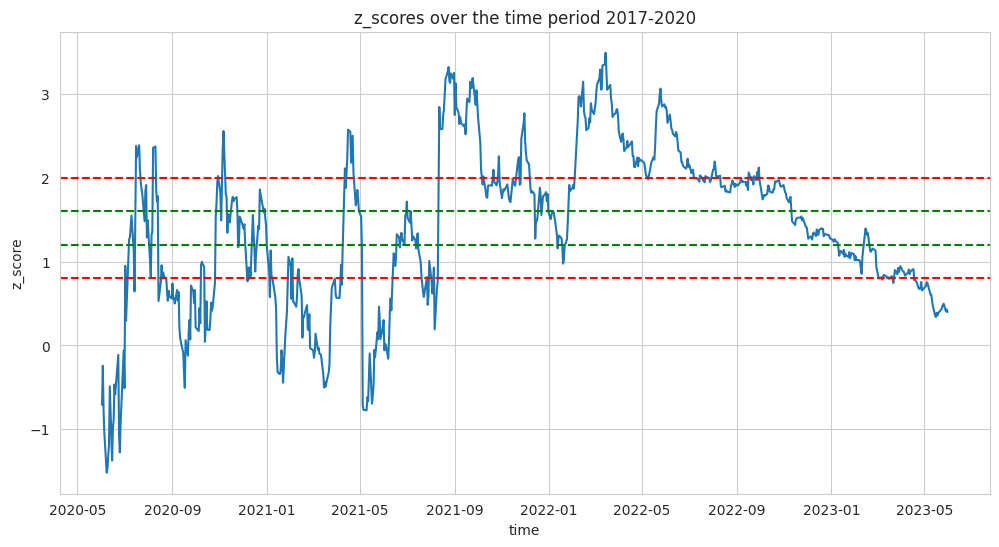

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(fdata['z_scores'])

plt.xlabel('time')
plt.ylabel('z_score')
plt.title('z_scores over the time period 2017-2020')
plt.axhline(1.6, color='green', linestyle='--')
plt.axhline(1.2, color='green', linestyle='--')
plt.axhline(2.0, color='red', linestyle='--')
plt.axhline(0.8, color='red', linestyle='--')
plt.show()

## Trading Strategy

After generating the graph of the z-score, we need to set our entry and exit points on which our positions or holdings depend.

Very first, we have deduced the mean of the z-score, which is 0.553471.

By doing random data sampling for the threshold values of entry points, we have come up with the following values, which generate maximum profits.

The values that we have taken are:(We have plotted these values in the graph provided with the code.)

**Entry points**: lower threshold value: 1.2

(When the z-score goes below this, we will be taking a LONG position i.e we’ll buy Cipla and sell Lupin)

upper threshold value:1.6

(When the z-score goes above this, we will be taking a SHORT position i.e we’ll sell Cipla and buy Lupin)


**Risk Management Measures**

**Exit points**: When these points are crossed, we’ll pause trading or don't hold any position to stop loss.

Lower exit point: 0.9

Upper exit point: 2.0

In [15]:
#part 2: stratergy and trading signals

#By looking at the z-score graph it is optimal to take entry and exit scores as -1 & 1.5 respectively

#stop-loss points
lower_exit_zscore=-0.1
upper_exit_zscore=0.6


profit_exit_point=1.3965609839553217  #whose value is calculated above(mean of zscore)

#entry points

lower_entry=0 #buy cipla and sell lupin
upper_entry=0.1  #sell cipla and buy lupin

fdata['signal1'] = np.select( [ ((fdata['z_scores'] > 1.6) & (fdata['z_scores']< 2.0)), ((fdata['z_scores'] < 1.2) & (fdata['z_scores']> 0.9))], [1, -1], default = 0)

# fdata['signal1'] = np.select( [fdata['z_scores'] > 1.6, fdata['z_scores'] < 1.2 ], [1, -1], default = 0)-neglect this comment


fdata['position1'] = fdata['signal1'].diff()
fdata['signal2'] = -fdata['signal1']
fdata['position2'] = fdata['signal2'].diff()


print(fdata['signal1'].value_counts())
fdata.dropna()








signal1
 0    532
 1    146
-1     70
Name: count, dtype: int64


,cipla,lupin,spread,rolling_std,z_scores,signal1,position1,signal2,position2
Date,,,,,,,,,
2020-06-02 00:00:00+05:30,625.959290,851.807983,0.200020,0.021790,-0.707107,0,0.0,0,0.0
2020-06-03 00:00:00+05:30,629.493591,848.092773,0.209692,0.015759,-0.242620,0,0.0,0,0.0
2020-06-04 00:00:00+05:30,648.490356,887.346741,0.197585,0.015133,-0.789516,0,0.0,0,0.0
2020-06-05 00:00:00+05:30,639.016541,882.213928,0.188233,0.016202,-1.051741,0,0.0,0,0.0
2020-06-08 00:00:00+05:30,623.504944,880.209717,0.165762,0.021684,-1.518444,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...
2023-05-25 00:00:00+05:30,937.843811,775.502808,0.691101,0.271000,0.480819,0,0.0,0,0.0
2023-05-26 00:00:00+05:30,943.696289,776.598083,0.696016,0.270864,0.498541,0,0.0,0,0.0
2023-05-29 00:00:00+05:30,948.556885,802.237427,0.671118,0.270712,0.406302,0,0.0,0,0.0


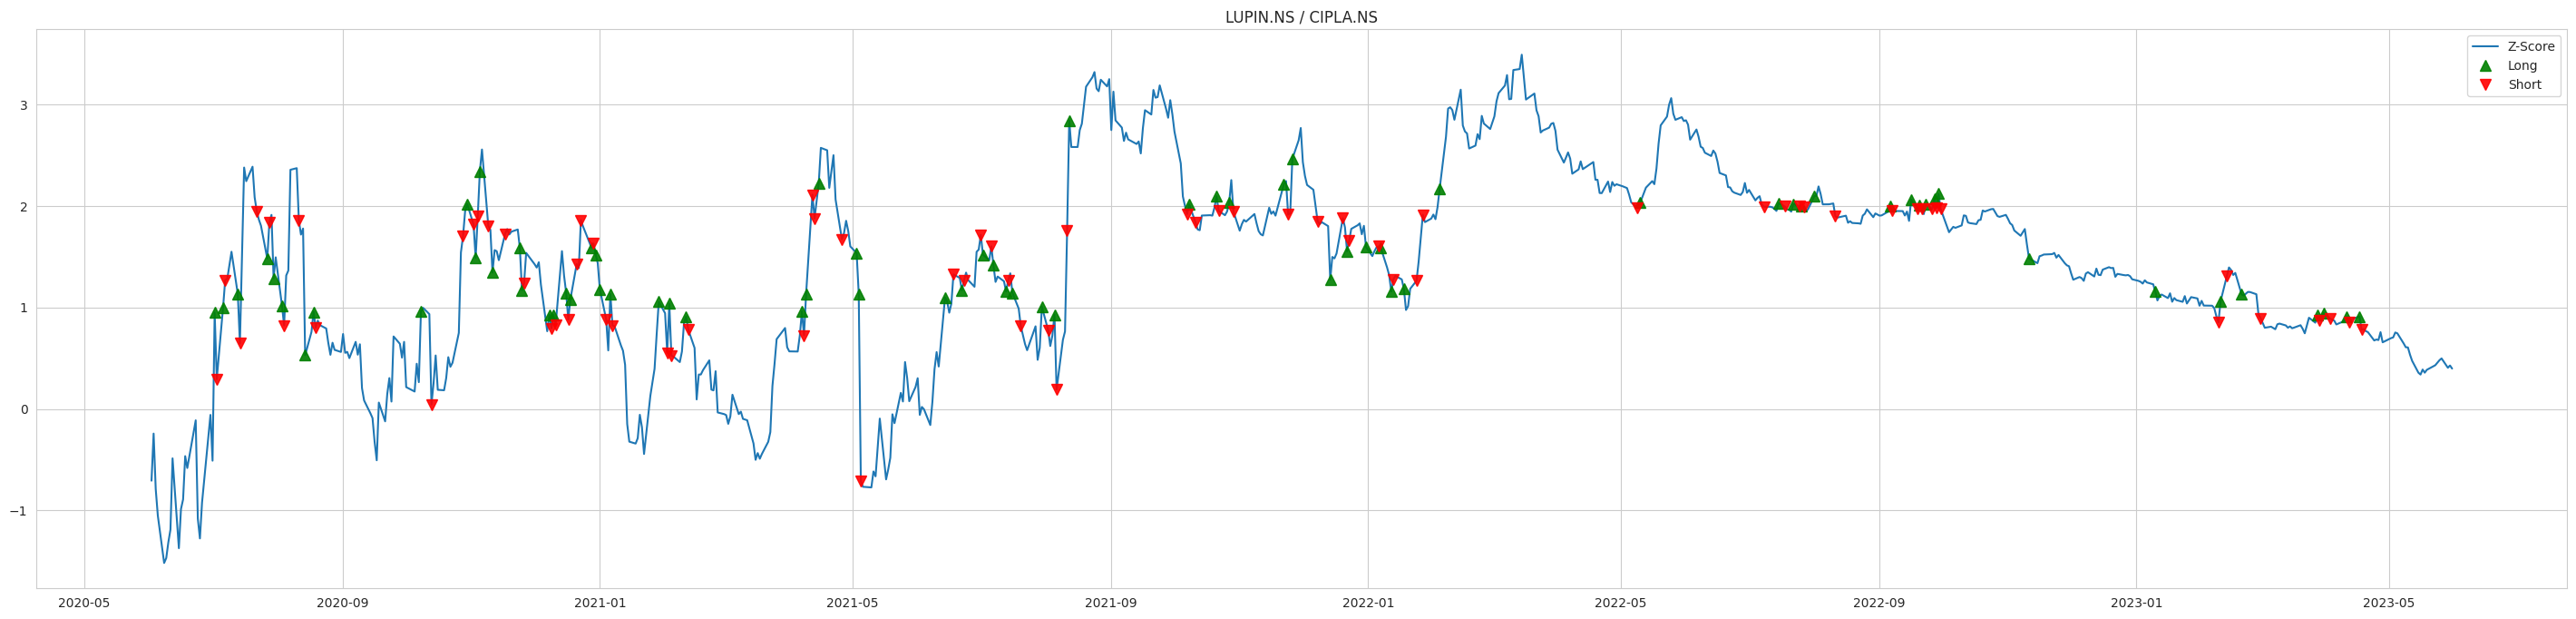

In [16]:

fig = plt.figure(figsize=(36, 8))
bx = fig.add_subplot(111)
series = bx.plot(fdata['z_scores'])
long = bx.plot(fdata['z_scores'][fdata['position1'] == -1], lw = 0, marker = '^', markersize = 8, c = 'g', alpha = 0.9)
short = bx.plot(fdata['z_scores'][fdata['position1'] == 1], lw = 0, marker = 'v', markersize = 8, c = 'r', alpha = 0.9)
stock1 = fstocks[0]
stock2 = fstocks[1]
plt.title(f'{stock2} / {stock1}')
plt.legend(['Z-Score', 'Long', 'Short'])
plt.show()

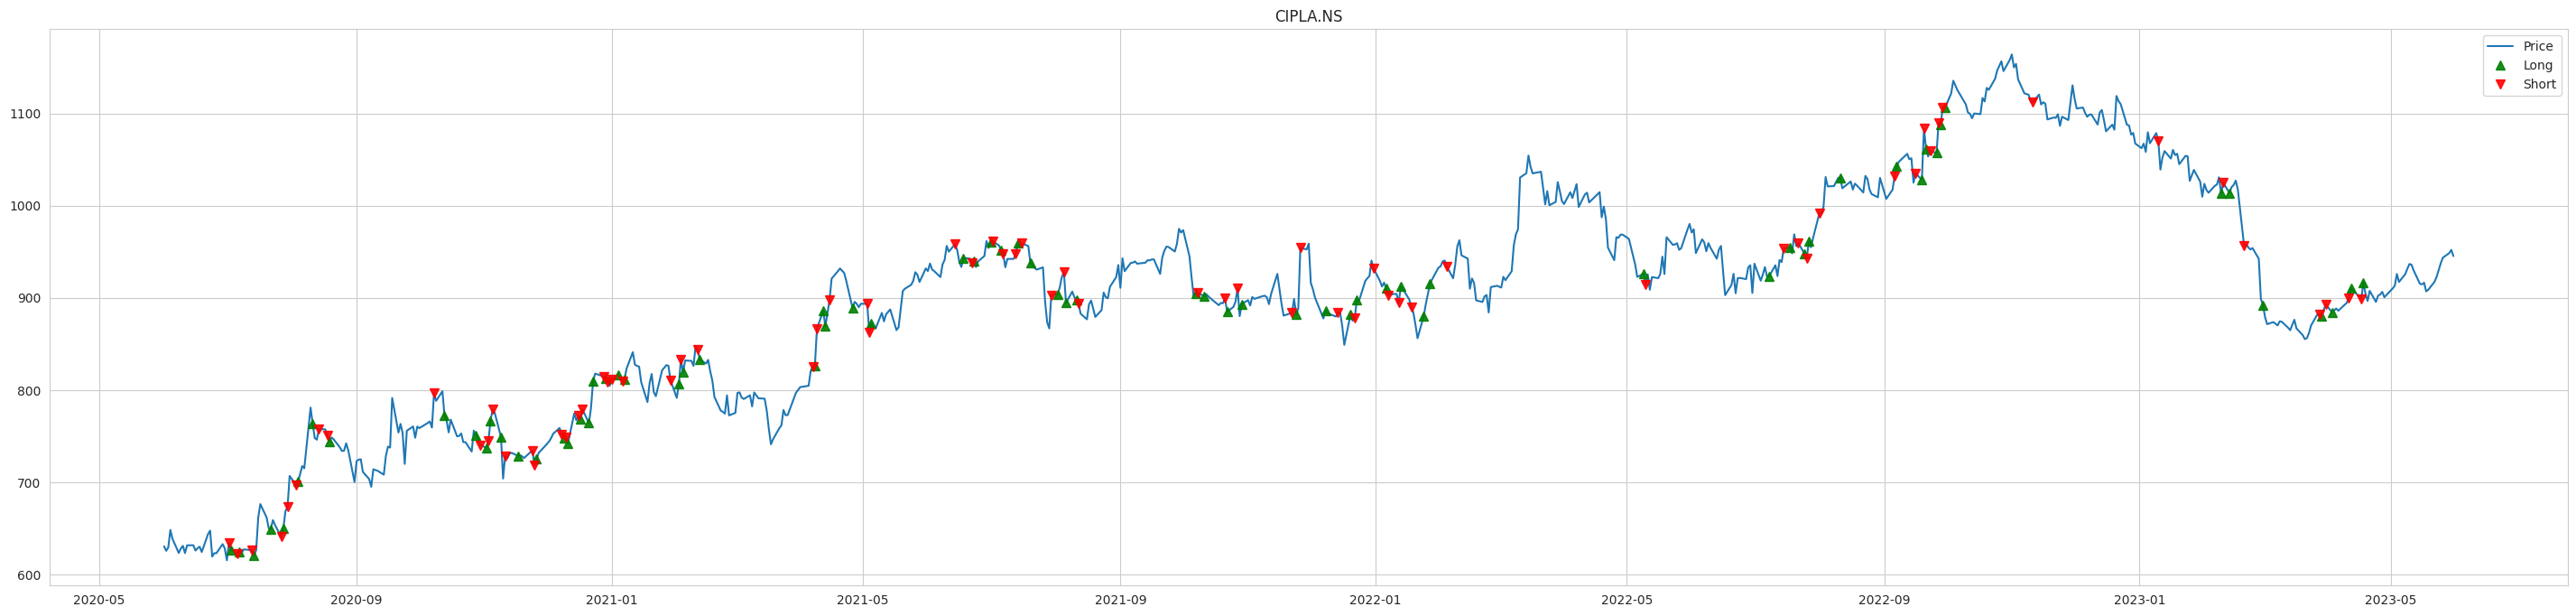

In [17]:
fig = plt.figure(figsize=(36,8))
bx = fig.add_subplot(111)
l1 = bx.plot(fdata['cipla'])
u1 = bx.plot(fdata['cipla'][fdata['position1'] == 1], lw=0, marker='^', markersize=7, c='g',alpha=0.9)
u2, = bx.plot(fdata['cipla'][fdata['position1'] == -1], lw=0, marker='v', markersize=7, c='r',alpha=0.9)
plt.title(fstocks[0])
plt.legend(['Price', 'Long', 'Short'])

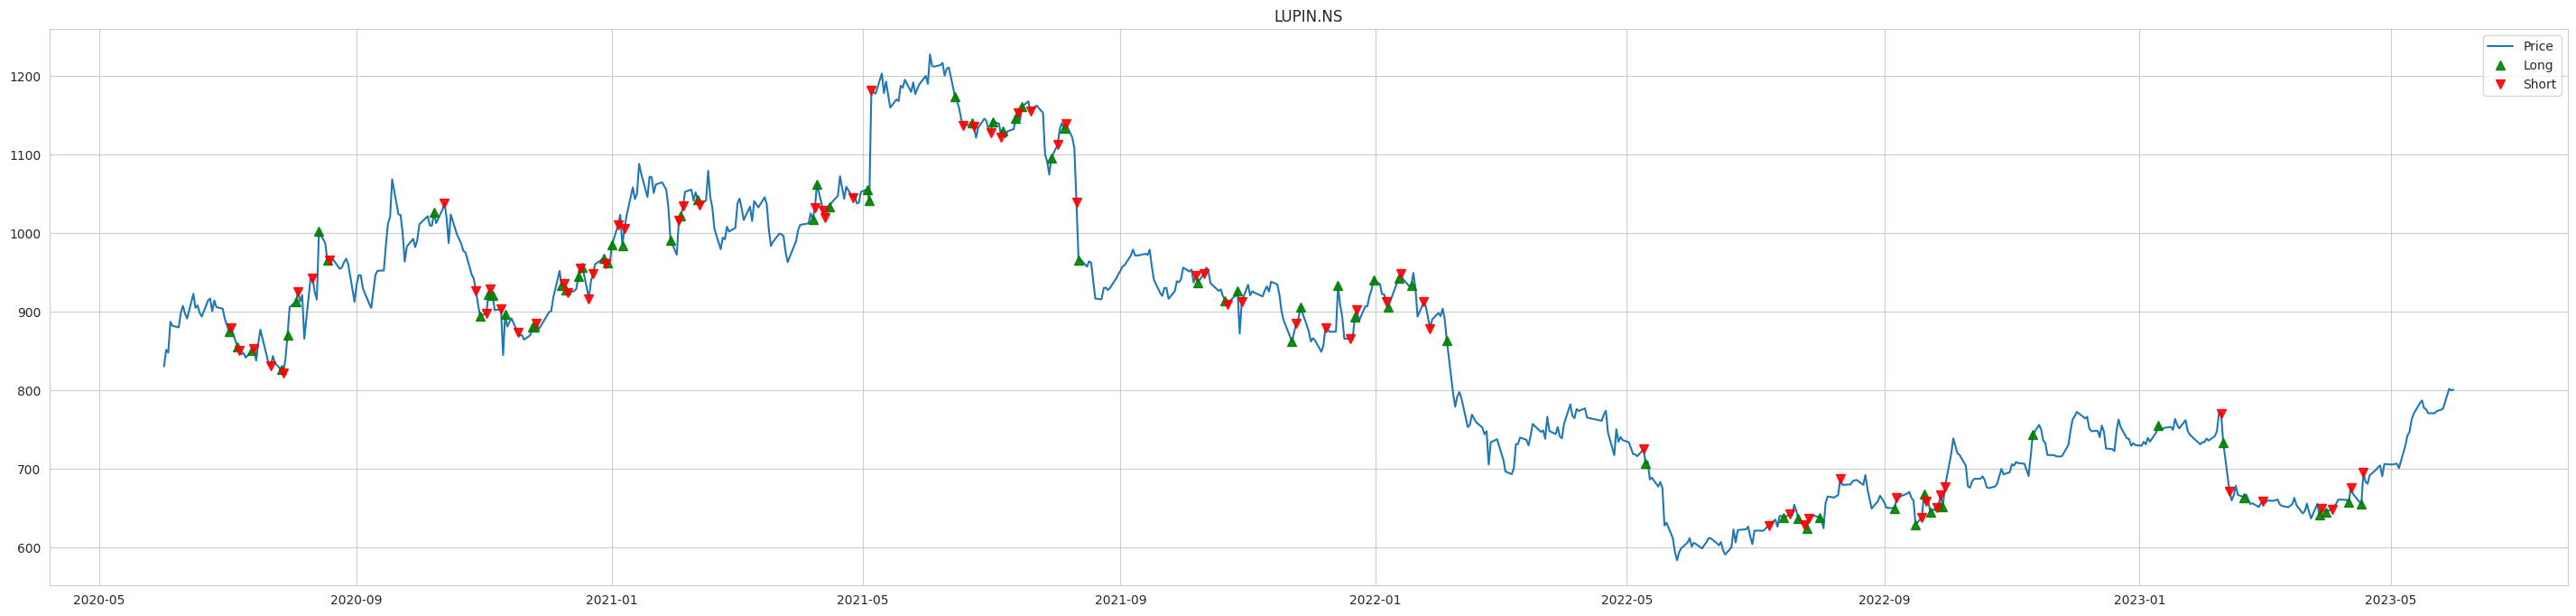

In [18]:
fig = plt.figure(figsize=(36,8))
bx = fig.add_subplot(111)
l1 = bx.plot(fdata['lupin'])
u1 = bx.plot(fdata['lupin'][fdata['position2'] == 1], lw=0, marker='^', markersize=7, c='g',alpha=0.9)
u2, = bx.plot(fdata['lupin'][fdata['position2'] == -1], lw=0, marker='v', markersize=7, c='r',alpha=0.9)
plt.title(fstocks[1])
plt.legend(['Price', 'Long', 'Short'])

## Trading Signals Generated and Position Sizing

From this, we have extracted the positions of both stocks, which are indicated in the following manner: 1 indicates to buy that stock

-1 indicates selling that stock

0 indicates we are not holding any positions on that particular day

In [19]:
#initially in position sizing we have divided our capital equally

initial_capital1 = 60000
initial_capital2 = 40000
shares1 = initial_capital1 // (fdata['cipla'][0])
shares2 = initial_capital2 // (fdata['lupin'][0])

portfolio = pd.DataFrame()
portfolio['cipla_holdings'] = fdata['position1'].cumsum() * fdata['cipla'] * shares1
portfolio['cipla_cash'] = initial_capital1 - (fdata['position1'] * fdata['cipla'] * shares1).cumsum()
portfolio['cipla_total'] = portfolio['cipla_holdings'] + portfolio['cipla_cash']
portfolio['cipla_return'] = portfolio['cipla_total'].pct_change()

portfolio['lupin_holdings'] = fdata['position2'].cumsum() * fdata['lupin'] * shares2
portfolio['lupin_cash'] = initial_capital2 - (fdata['position2'] * fdata['lupin'] * shares2).cumsum()
portfolio['lupin_total'] = portfolio['lupin_holdings'] + portfolio['lupin_cash']
portfolio['lupin_return'] = portfolio['lupin_total'].pct_change()

portfolio['total'] = portfolio['cipla_total'] + portfolio['lupin_total']
portfolio.dropna(inplace=True)
portfolio


,cipla_holdings,cipla_cash,cipla_total,cipla_return,lupin_holdings,lupin_cash,lupin_total,lupin_return,total
Date,,,,,,,,,
2020-06-03 00:00:00+05:30,0.0,60000.000000,60000.000000,0.0,0.0,40000.000000,40000.000000,0.0,100000.000000
2020-06-04 00:00:00+05:30,0.0,60000.000000,60000.000000,0.0,0.0,40000.000000,40000.000000,0.0,100000.000000
2020-06-05 00:00:00+05:30,0.0,60000.000000,60000.000000,0.0,0.0,40000.000000,40000.000000,0.0,100000.000000
2020-06-08 00:00:00+05:30,0.0,60000.000000,60000.000000,0.0,0.0,40000.000000,40000.000000,0.0,100000.000000
2020-06-09 00:00:00+05:30,0.0,60000.000000,60000.000000,0.0,0.0,40000.000000,40000.000000,0.0,100000.000000
...,...,...,...,...,...,...,...,...,...
2023-05-25 00:00:00+05:30,0.0,109907.696838,109907.696838,0.0,0.0,44095.694336,44095.694336,0.0,154003.391174
2023-05-26 00:00:00+05:30,0.0,109907.696838,109907.696838,0.0,0.0,44095.694336,44095.694336,0.0,154003.391174
2023-05-29 00:00:00+05:30,0.0,109907.696838,109907.696838,0.0,0.0,44095.694336,44095.694336,0.0,154003.391174


## **Portfolio Performance**

**PnL Calculation**

We have obtained a profit of over Rs. 53,593.91.

The explanation of this calculation follows below :

Through the positions acquired previously,

We calculate the total assets corresponding to CIPLA and the total assets corresponding to LUPIN

Summing this up, we get our profit

**Portfolio Returns**

**Annualized Sharpe Ratio**

July 2020-July 2021: 0.61

July 2021-July 2022: 0.70

July 2022-July 2023: 1.32

**CAGR** = 15.60%

**Maximum Drawdown** = 4.50%

**Frequency of trades placed** = 216 days

**Cumulative Returns** = Rs. 53,593.91(53.59%)

**CAGR** :

Compound annual growth rate (CAGR) is a way to measure how an investment or business has grown over a specific period of time. It takes into account the effect of compounding, which means that the growth builds upon itself.

**Maximum Drawdown**:

Maximum drawdown (MDD) is a measure of an asset's largest price drop from a peak to a trough. Maximum drawdown is considered to be an indicator of downside risk, with large MDDs suggesting that down movements could be volatile.

**Sharpe Ratio **:

The Sharpe ratio compares the return on investment with its risk. It's a mathematical expression of the insight that excess returns over a period of time may signify more volatality and risk rather than investing skill.

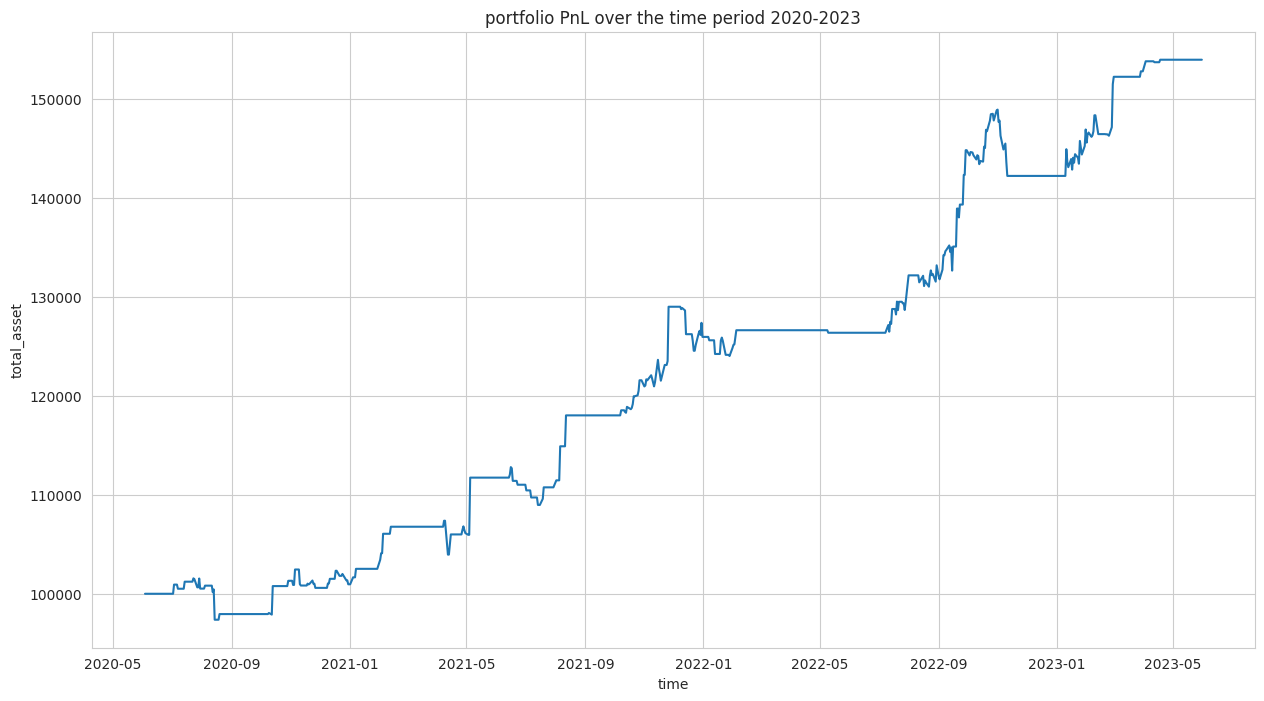

In [20]:
plt.figure(figsize=(15,8),)
plt.plot(portfolio['total'])
plt.title('portfolio PnL over the time period 2020-2023')
plt.xlabel('time')
plt.ylabel('total_asset')
plt.show()


In [21]:
# frequency of trades placed =no of trading days that is either or pair is SHORT or LONG position
# we have calculated no of 1's and -1's in signal column
frequency_of_trades_placed=746
final_portfolio=portfolio['total'][745]
initial_portfolio=portfolio['total'][2]
YEAR_DAYS = 252
CAGR = ((final_portfolio/initial_portfolio) ** (YEAR_DAYS/frequency_of_trades_placed) - 1)*100
CAGR



15.703909005524984

In [22]:
from statsmodels.tools.sm_exceptions import PerfectSeparationError
rows1 = portfolio.loc[["2021-06-01 00:00:00+05:30"]]
rows2 = portfolio.loc[["2022-06-01 00:00:00+05:30"]]
rows3 = portfolio.loc[["2023-05-31 00:00:00+05:30"]]

expected_return_pct1=((rows1['total'][0]-100000)/100000)*100
expected_return_pct2=((rows2['total'][0]-rows1['total'][0])/rows1['total'][0])*100
expected_return_pct3=((rows3['total'][0]-rows2['total'][0])/rows2['total'][0])*100

pct_portfolio_std=(portfolio['total'].std()/portfolio['total'].mean())*100

#annulised_sharpe_ratio=expected portfolio return(%) -3%(govt.standard) /pct_portfolio_std
#all the above values are in percentage

sharpe_ratio1=(expected_return_pct1-3)/pct_portfolio_std
sharpe_ratio2=(expected_return_pct2-3)/pct_portfolio_std
sharpe_ratio3=(expected_return_pct3-3)/pct_portfolio_std

print(sharpe_ratio1)
print(sharpe_ratio2)
print(sharpe_ratio3)



0.6121044355238483
0.7077184112812654
1.319080597459907


In [38]:
portfolio['cummax'] = portfolio['total'].cummax()
portfolio['drawdown'] = (portfolio['total'] - portfolio['cummax'])/ portfolio['cummax']
max_drawdown = portfolio['drawdown'].min()
print(f"Maximum Drawdown: {abs(max_drawdown):.2%}")

Maximum Drawdown: 4.50%
